<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/FaceRecognitionSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

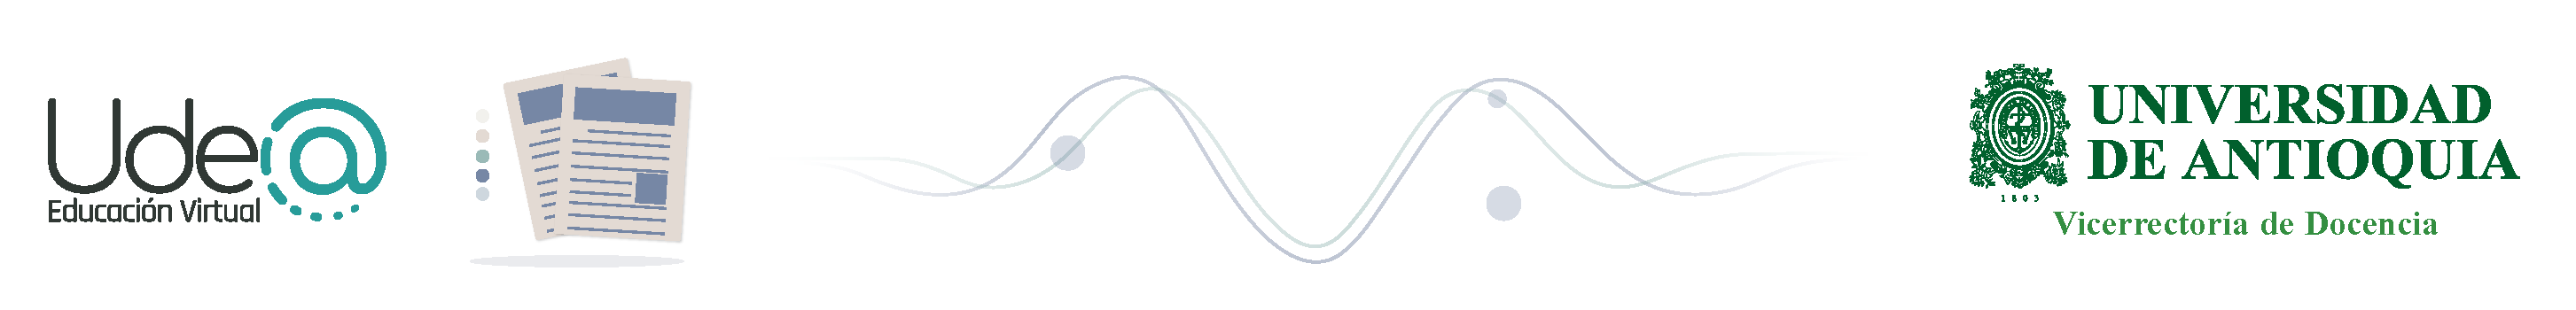

# Miniproject 2: Face Recognition sistems
### Classify _Labeled Faces in the Wild (LFW) people dataset_ with Convolutional Neural Networks, Support Vector Machines and Deep Neural Networks

##### University of Antioquia
##### Faculty of Engineering
##### Department of Electronical & Telecommunications Engineering
##### October 2022

**Signal Processing for Machine Learning** 

**Professor:** Hernán Felipe García Arias

**Developers:**
- Camilo Hernández Ruiz
- Yan Sebastian Hoyos Cataño

# 1. Load and process the dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import random

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
print(f'Target names: {lfw_people.target_names}')

flatten_data = lfw_people.data # used for ordinary ANN
target = lfw_people.target
print(f'''Dimensions: 
      Data.shape = ({flatten_data.shape[0]}, {lfw_people.images[0].shape[0]}*{lfw_people.images[0].shape[1]}) = {flatten_data.shape})
      Target.shape = {target.shape}''')

images = lfw_people.images # used for convolutional neural networks
print(f'Data images dimensions: {images.shape}')

Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Dimensions: 
      Data.shape = (1288, 50*37) = (1288, 1850))
      Target.shape = (1288,)
Data images dimensions: (1288, 50, 37)


Dimensions of the image 687: (50, 37)


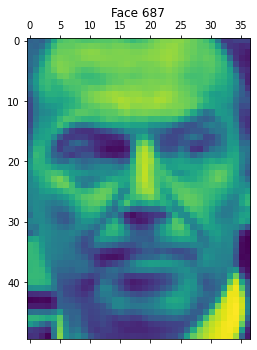

In [ ]:
i = random.randint(0, 1288)
print(f'Dimensions of the image {i}: {images[i].shape}')

plt.matshow(lfw_people.images[i])
plt.title(f"Face {i}")
plt.show()

# 2. Convolutional Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

## Preprocessing the data
### Split the data into train/validation/test data sets
*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [ ]:
#Data split
x_reminder, x_test, y_remainder, y_test = train_test_split(
    images, target, test_size = 0.2, random_state = 0)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_reminder, y_remainder, test_size = 0.2, random_state = 0)

### Normalization

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. Here is a simple example of scaling the data using the standard deviation with StandardScaler.

```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Don't cheat - fit only on training data
X_train = sc.fit_transform(x_train)
# apply same transformation to test data
X_test = sc.transform(x_test)
```

However, the _Labeled Faces in the Wild (LFW) people dataset_ already has scaled values in range [0, 1]. Therefore, scaling the data is not necessary.

### Convert the format of the input and output sets into Keras-acceptable format
Let's work with Keras.

In [ ]:
# Reshape input data from (50, 37) to (50, 37, 1) to make it acceptable by keras models.
w, h = 50, 37
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 7)
y_valid = to_categorical(y_valid, 7)
y_test = to_categorical(y_test, 7)

# Print training set shape
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (824, 50, 37, 1) 
y_train shape: (824, 7, 7)
824 train set
206 validation set
258 test set


In [ ]:
print(to_categorical(y_train[13:23], 7))

[[[[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 

## Create the model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this project we are using the Sequential model API. 

In defining the model we will be using some of these Keras APIs:
*   [Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   [Pooling()](https://keras.io/layers/pooling/) - create a pooling layer 
*   [Dropout()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

**Convolutional Layer**

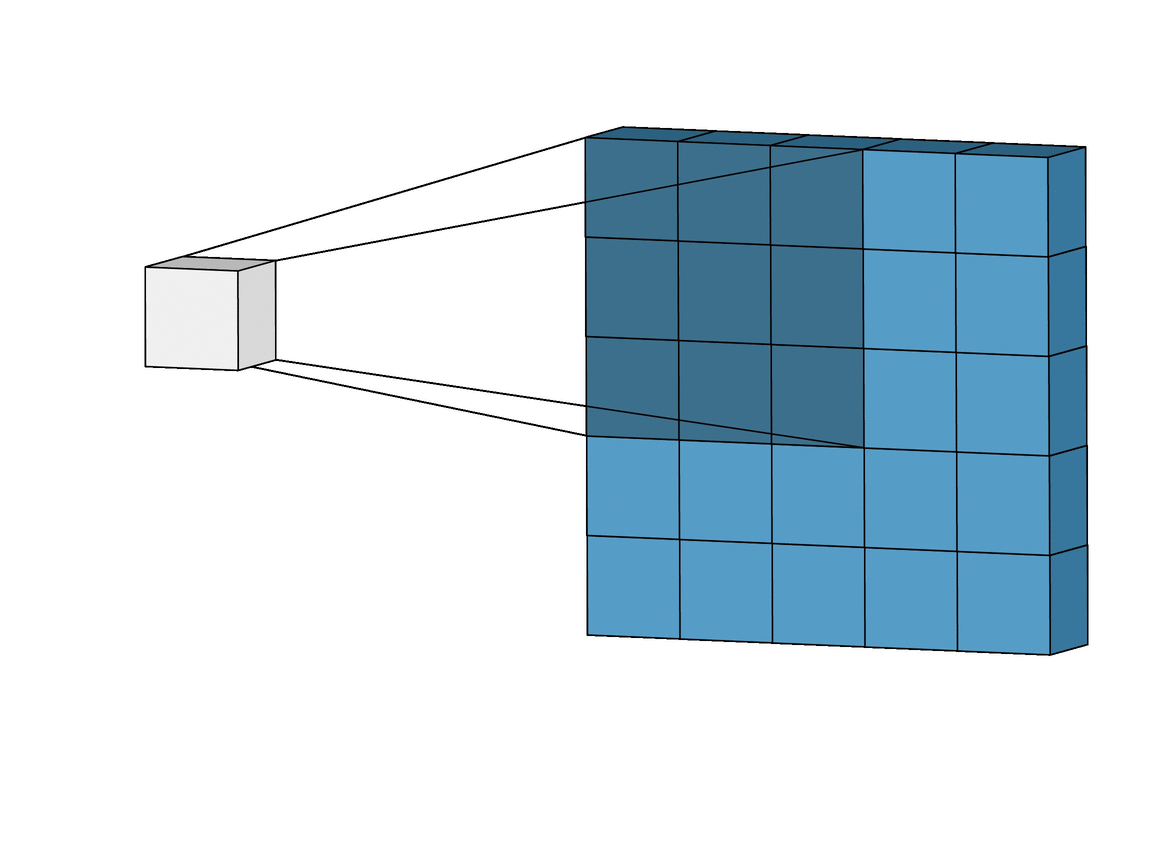

**Pooling**

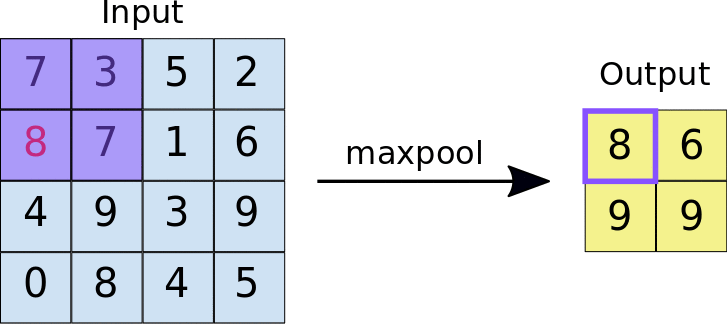

**Dropout**

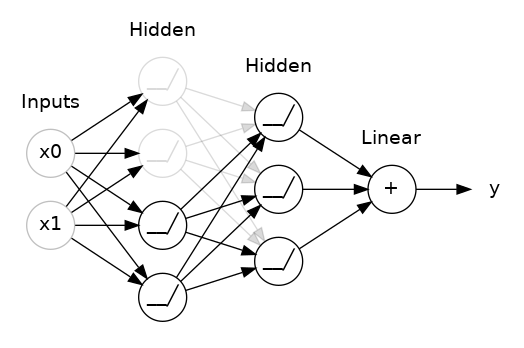

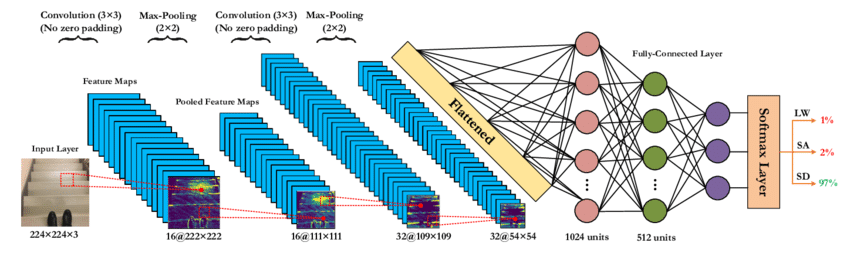

In [ ]:
# Model creation
model = keras.Sequential()

# The classical arquitecture of a neural network model is: convolution -> pooling -> dropout
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (w, h,1))) 
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2)) # turn off 20% of neurons on each iteration

model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# Output layer must have size equal to the number of classes
# Softmax activation is used for classification, while linear is used for regression
model.add(Dense(target.max()+1, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 37, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 25, 18, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 18, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 9, 32)        0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 12, 9, 32)       

**Model summary:**
1. Convolutional layer: 50*37 are the dimensions of the images, 64 are the number of convolutional filters.
2. Max pooling 2D layer: 25*18 are half of the dimensions of the images, chosen from the pool size parameter.
3. Dropout layer: same dimensions as the max pooling layer.
4. Convolutional layer: takes the results from the dropout layer and returns 32 filter results.
5. Max pooling 2D layer: takes the results from the convolutional layer and returns images half sized of the input matrix.
6. Dropout layer.
7. Flatten layer: flattens the output of the dropout layer.
8. Dense layer: fully connected layer.
9. Dropout layer.
10. Dense layer: output layer.

Only the convolutional and the dense layers provide trainable parameters. Total number of params: 1799.

## Compile the model
Configure the learning process with *compile()* API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [ ]:
model.compile(loss = 'categorical_crossentropy', # Para multiclase siempre se recomienda inicialmente
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.

In [ ]:
# Create the checkpointer, a file that saves the model with the best accuracy
checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 1, save_best_only = True)

# Train the model using the training and the validation datasets.
start_training_time = time()
model.fit(x_train,
         y_train,
         batch_size = 64, # number of training examples that are chosen randomly from the training set on every epoch. It Could more o less depending on your machine
         epochs = 20, # could be any number of epochs. You must keep an eye if more epochs give opportunity to train the model even better but be careful of causing overfitting
         validation_data = (x_valid, y_valid),
         callbacks = [checkpointer]) # callbacks -> list of moments when the model results are saved, using the checkpointer object.
training_time = time() - start_training_time
print('Training time:', training_time)

## Load Model with the best validation accuracy

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose = 0)

# Print test error and accuracy
print('\n', 'Test error:', score[0])
print('\n Test accuracy:', score[1])
# Using the model to predict the outcome of two elements in the test set
print('Testing the first 2 elements of the test set...')
testEtq = model.predict(x_test[:2,:])
print(f'\n True label: {y_test[:2]}')
print(f'\n Predicted label: {np.argmax(testEtq, axis = 1)}')

## Train and test division

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    flatten_data, target, test_size=0.2, random_state=0)

# Principal Component Analysis (PCA)
A PCA transformation has been made to reduce the number of dimensions of the dataset

In [ ]:
def addtext(x, y, percentage, box_color):
  """Add text at a given position of the bar/stem plot

  Args:
      x (float): x coordinate of the point
      y (float): y coordinate of the point
      percentage (float): percentage of the y coordinate given in range [0,1]
      box_color (str): color of the bar/stem plot
      
  Returns:
      None
  """
  for i in range(len(x)):
      plt.text(i, y[i]*percentage, y[i], ha='center',
                bbox=dict(facecolor=box_color, alpha=0.4))

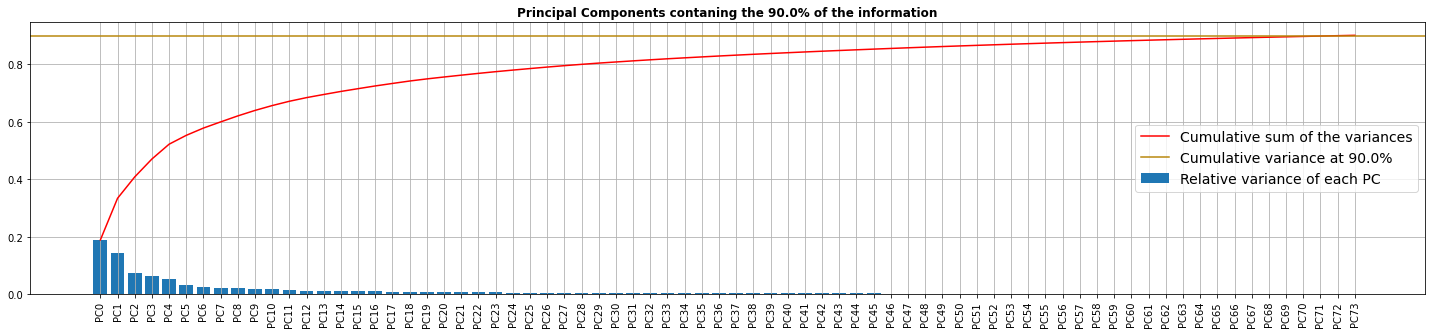

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(0.9).fit(x_train)  # fitted model declaration
X_train_pca = pca.transform(x_train) # train data in latent space
ncomp = X_train_pca.shape[1] # 112 # number of components_
PCAcolumns = [f'PC{i}' for i in range(ncomp)]  # names of PCA columns
fig_size = (25,5) # fig size for plotting
variance_threshold = 0.9

# Plot of the relative variance of the PCA components
plt.figure(figsize = fig_size)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:ncomp]),'r',label = 'Cumulative sum of the variances')
plt.bar(PCAcolumns, abs(pca.explained_variance_ratio_[:ncomp]),label = 'Relative variance of each PC')
plt.xticks(rotation = 'vertical')
plt.axhline(variance_threshold, c = 'darkgoldenrod', label = f'Cumulative variance at {variance_threshold*100}%')
# addtext(PCAcolumns, abs(pca.explained_variance_ratio_[:ncomp].round(3)) , .5, 'yellow')
# addtext(PCAcolumns, abs(np.cumsum(pca.explained_variance_ratio_[:ncomp]).round(3)) , 1, 'pink')
plt.legend(loc = 'center right', fontsize = 14)
plt.title(f'Principal Components contaning the {variance_threshold*100}% of the information', fontweight = "bold")
plt.grid(True)
plt.show()

Since PC0 explains most of the variance in the training dataset, its eigenvalues represents the most significant importance of every single feature in the training dataset.

Then, if we wanted to use the original features, we could use PC0 to select the most significant features according to these eigenvalues, also called importance coefficients.

Here's an example of using a variance threshold to select the most important features.

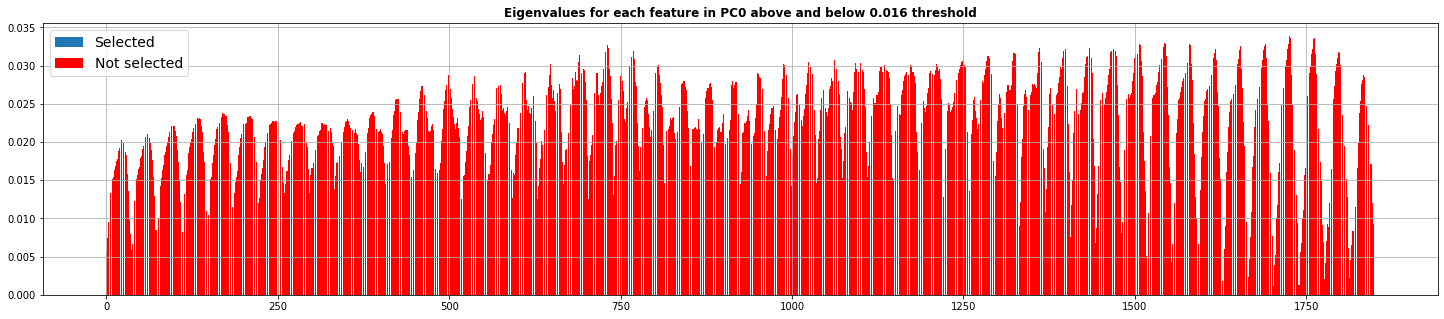

In [ ]:
# Importance coefficients plot for each feature in PC0
feature_threshold = 0.016
selected_features = abs(pca.components_[0][np.where(pca.components_[0] > feature_threshold)])
not_selected_features = abs(pca.components_[0][np.where(pca.components_[0] <= feature_threshold)])
index_sel_features = np.where(pca.components_[0] > feature_threshold)[0]
index_not_sel_features = np.where(pca.components_[0] <= feature_threshold)[0]
plt.figure(figsize = fig_size)
plt.bar(index_sel_features,selected_features, color = 'blue', label = 'Selected')
plt.bar(index_not_sel_features, not_selected_features, color = 'r', label = 'Not selected')
plt.legend(fontsize = 14)
#addtext(range(X.shape[1]), abs(pca.components_[0]).round(3), 2, 'yellow')
plt.title(f'Eigenvalues for each feature in PC0 above and below {feature_threshold} threshold', fontweight = "bold")
plt.grid(True)
plt.show()

Now we apply the PCA transformation to the testing data and thus obtain the definitive training and testing input sets.

In [ ]:
X_test_pca = pca.transform(x_test)

At this point, the respective dimensions of the different sets are:
- **Original data** -> (1288, 1850)
- **Training and testing sets:** *x_train & x_test* -> (1030, 1850) & (258, 1850)
- **Scaled Training and testing sets:** *X_train & X_test* -> (1030, 1850) & (258, 1850)
- **PCA transformed Training and testing sets:** *X_train_pca & X_test_pca* -> (1030, 112) & (258, 112)

Usages:
- _(X_train_pca, y_train)_ to train the models
- _(X_test_pca, y_test)_ to test the models

# 2. SVM

In [ ]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = flatten_data
y = target

C =  10 	Acc(%):  0.8242894056847545


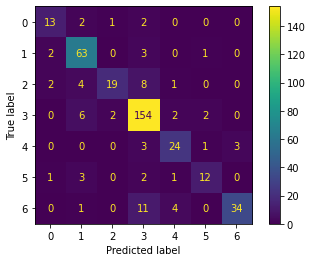

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3 , random_state = 42)

C = 10
    
modelSVM = svm.SVC(C = C, kernel = 'rbf', probability = True)
modelSVM.fit(Xtrain, ytrain)
yPred = modelSVM.predict(Xtest)
yPred_proba = modelSVM.predict_proba(Xtest)
CMAT = confusion_matrix(ytest, yPred)
porcentajeAcierto = accuracy_score(ytest, yPred)
print('C = ', C, '\tAcc(%): ', porcentajeAcierto)
ax = ConfusionMatrixDisplay(CMAT)  
ax.plot()
plt.show()

In [ ]:
print(roc_auc_score(ytest, yPred_proba , multi_class = 'ovr'))
print(roc_auc_score(ytest, yPred_proba , multi_class = 'ovo'))

0.9679605598812688
0.9635832039550668


# 3. Deep Learning

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers.core import Dropout

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = [len(X_train_pca.T)]),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mae', 'mse'])
  return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
#X_t_pca = X_train_pca.T
example_batch = X_train_pca[:10]
example_result = model.predict(example_batch)
example_result

array([[ -13.279816],
       [-111.5186  ],
       [  15.05381 ],
       [  -6.95335 ],
       [ -19.762548],
       [ -33.278187],
       [  15.039101],
       [ -12.857298],
       [ -22.904346],
       [ -18.229797]], dtype=float32)

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train_pca, y_train,
  epochs = EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.079142,0.202412,0.079142,1.411840,0.705769,1.411840,995
996,0.101090,0.223377,0.101090,1.467466,0.724663,1.467466,996
997,0.095677,0.221398,0.095677,1.444371,0.717473,1.444371,997
998,0.094475,0.213576,0.094475,1.456007,0.723638,1.456007,998
999,0.092915,0.214083,0.092915,1.498546,0.728006,1.498546,999


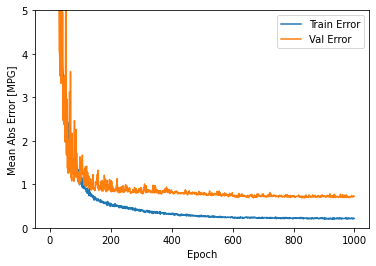

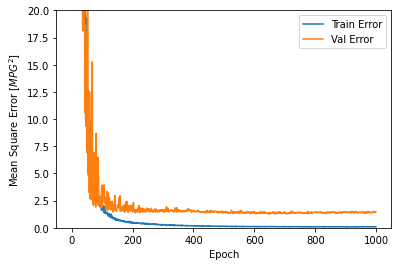

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
............................................................................................

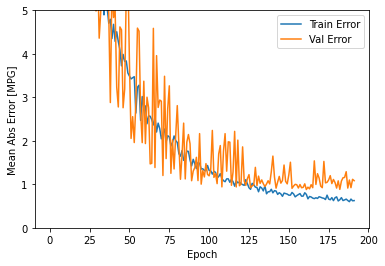

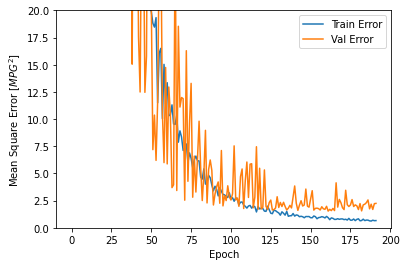

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30)

history = model.fit(X_train_pca, y_train, epochs = EPOCHS,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test_pca, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

9/9 - 0s - loss: 1.6326 - mae: 0.9795 - mse: 1.6326 - 45ms/epoch - 5ms/step
Testing set Mean Abs Error:  0.98 MPG


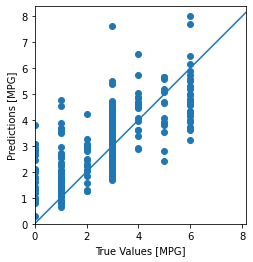

In [ ]:
test_predictions = model.predict(X_test_pca)#.flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

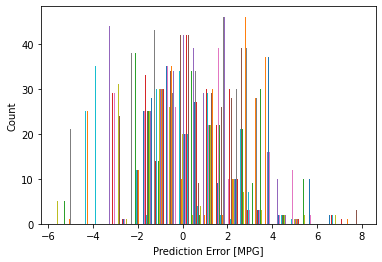

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Observations

- La cantidad de componentes extraídos con PCA al 90% de la varianza es de 112 mientras que la cantidad de característica en el espacio de entrada es de 50*37 = 1850. Se redujeron en 94% la cantidad neta de características.
- `ModelCheckpoint` sirve para guardar el último mejor modelo en función del *loss* de validación. Si las iteraciones siguientes al mejor modelo incrementan dicha pérdida, el modelo no se guarda en el archivo `model.weights.best.hdf5` del cual luego puedo recuperarse.

# Conclusions

- El `ModelCheckpoint` es bastante útil puesto que por defecto, el objeto `model` realmente almacena los parámetros de la última iteración. Por tanto, con este *checkpointer* se puede ahorrar tiempo al momento de entrenar el mejor modelo posible, puesto que luego de entrenar, la cantidad de `epochs` se puede variar pensando en evitar exclusivamente el *overfitting*, es decir, se elimina la preocupación de encontrar el valor de `epochs` necesario para encontrar la mejor *accuracy* de entrenamiento.
- Utilizar redes convolucionales evita la extracción de características utilizando PCA puesto que las capas de convolución las extrae. Conceptos como el gradiente del color, de los bordes, la profundidad o la iluminación son algunas de las características extraídas a más profunda es la capa de convolución dentro de la red.
- Se encontró que ingresando 60 `epochs` se produce overfitting. Fue detectado al observar que el accuracy de entrenamiento es cerca del 97% pero el de testing es de 64%. Por tanto, se dejaron 20 `epochs` pues con esto el *accuracy* de entrenamiento es de 85% y el de *testing* es de 75%
- Respecto al `batch_size`, hemos encontrado una contradicción entre la práctica y la teoría.
  - En teoría, `batch_size` es el número de ejemplos que se introducen en la red para que entrene de cada vez. Si el número es pequeño, significa que la red tiene en memoria poca cantidad de datos, y entrena más rápido. Sin embargo, es posible que no aprenda las características y detalles que pueden ser significativos en la predicción. Si es grande, ocurre al contrario: es más probable que tenga en cuenta los casos más importantes a la hora de aprender, pero entrena más lento.
  - En la práctica:
    - `batch_size = 1` produjo:
      
      `loss: 0.2887 - accuracy: 0.8871 - val_loss: 0.7453 - val_accuracy: 0.8107 - Training time: 102.15 s`
  
    - `batch_size = 64` produjo:
      
      `loss: 0.4415 - accuracy: 0.8471 - val_loss: 0.6496 - val_accuracy: 0.7913 - Training time: 31.63 s`

    - `batch_size = x_train.shape[0]`, la cantidad completa del *training set* igual a 824 ejemplares, produjo:
      
      `loss: 1.5624 - accuracy: 0.4187 - val_loss: 1.6288 - val_accuracy: 0.4369 - Training time: 16.76 s`
      
  ¿Cómo es posible que entrenando con todos los ejemplos, el *accuracy* disminuya y el tiempo de entrenamiento aumente?
  
  Respuesta: porque el `batch_size` realmente significa la porción del total de ejemplares utilizados para entrenar, no el número bruto de ejemplares a entrenar. Es por esta razón que aparece 13/13 al terminar cada época al utilizar `batch_size = 64`, porque 824/64 = 12.8, redondeado al techo da 13 ejemplares, mientras que con `batch_size = 824`, aparece 824/824 igual a sólo 1 ejemplar ingresado al modelo por cada época. Si son 20 épocas, sólo 20 de los 824 individuos de entrenamiento ingresan a la red en total.